<table class="table table-bordered">
    <tr>
        <th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Deep Learning in Natural Language Processing</h1><h2>Assignment (Problem 2) - Character Generator Model</h2><h3>AY2024/25 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
import re
import string
# from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

### necessary functions from the keras library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LSTM, GRU
from tensorflow.keras.optimizers import RMSprop
#from tensorflow.keras.utils.data_utils import get_file
import tensorflow.keras
import random

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization

In [3]:
import datetime
import pandas as pd

## Step 1 – Data Loading and Processing

### 1.1 Data Loading

In [4]:
# Open the file in read mode
with open('Harry_Potter_Book2.txt', 'r', encoding='utf-8') as f:
    content = f.read().lower()
    
# Print the content
print('The total number of characters in the original text is: ' + str(len(content)) + ' characters')

The total number of characters in the original text is: 531708 characters


In [5]:
print (content[:2000])


j . k . r o w l ! n g 

harry 

potter 




/ 




the worst birthday 

not for the first time, an argument had broken out 
over breakfast at number four, privet drive. mr. 
vernon dursley had been woken in the early hours of 
the morning by a loud, hooting noise from his nephew 
harry’s room. 

“third time this week!” he roared across the table. “if 
you can’t control that owl, it’ll have to go!” 

harry tried, yet again, to explain. 

“she’s bored,” he said. “she’s used to flying around 
outside. if i could just let her out at night — ” 

“do i look stupid?” snarled uncle vernon, a bit of 
fried egg dangling from his bushy mustache. “i know 
what 11 happen if that owl’s let out.” 

he exchanged dark looks with his wife, petunia. 

harry tried to argue back but his words were drowned 
by a long, loud belch from the dursleys’ son, dudley. 

page | 2 harry potter and the chamber of secrets - j.k. rowling 



“i want more bacon.” 



“there’s more in the frying pan, sweetums,” said aunt

Unnecessary characters are those that don't contribute to the understanding of the text and can be removed to clean and preprocess the data. These can include:

- Punctuation Marks: Unless needed for sentiment or context, punctuation marks are often removed. Examples include commas, periods, exclamation marks, etc.

- Special Characters: Characters like #, @, &, $, etc., which don't add semantic value.

- Whitespace: Extra spaces, tabs, and newlines that are not necessary for understanding.

- HTML Tags: Tags like \<div\>, \<p\>, etc., are removed when processing web data.

- Stop Words: Commonly used words like 'the', 'is', 'in', which don't add much meaning to a sentence.

- Numbers: In some cases, numbers might be considered unnecessary unless they are critical to the context.

- Non-ASCII Characters: Especially in cases where the text is expected to be in a particular language or script.

In [6]:
def remove(char2Remove, text):
    text = text.replace(char2Remove, '')
    return text

In [7]:
# remove newline character
content = remove('\n', content)

In [8]:
print (content[:2000])

j . k . r o w l ! n g harry potter / the worst birthday not for the first time, an argument had broken out over breakfast at number four, privet drive. mr. vernon dursley had been woken in the early hours of the morning by a loud, hooting noise from his nephew harry’s room. “third time this week!” he roared across the table. “if you can’t control that owl, it’ll have to go!” harry tried, yet again, to explain. “she’s bored,” he said. “she’s used to flying around outside. if i could just let her out at night — ” “do i look stupid?” snarled uncle vernon, a bit of fried egg dangling from his bushy mustache. “i know what 11 happen if that owl’s let out.” he exchanged dark looks with his wife, petunia. harry tried to argue back but his words were drowned by a long, loud belch from the dursleys’ son, dudley. page | 2 harry potter and the chamber of secrets - j.k. rowling “i want more bacon.” “there’s more in the frying pan, sweetums,” said aunt petunia, turning misty eyes on her massive son.

In [9]:
content = remove('\r', content)
print (content[:2000])

j . k . r o w l ! n g harry potter / the worst birthday not for the first time, an argument had broken out over breakfast at number four, privet drive. mr. vernon dursley had been woken in the early hours of the morning by a loud, hooting noise from his nephew harry’s room. “third time this week!” he roared across the table. “if you can’t control that owl, it’ll have to go!” harry tried, yet again, to explain. “she’s bored,” he said. “she’s used to flying around outside. if i could just let her out at night — ” “do i look stupid?” snarled uncle vernon, a bit of fried egg dangling from his bushy mustache. “i know what 11 happen if that owl’s let out.” he exchanged dark looks with his wife, petunia. harry tried to argue back but his words were drowned by a long, loud belch from the dursleys’ son, dudley. page | 2 harry potter and the chamber of secrets - j.k. rowling “i want more bacon.” “there’s more in the frying pan, sweetums,” said aunt petunia, turning misty eyes on her massive son.

In [10]:
# https://codefather.tech/blog/python-replace-multiple-spaces-with-one/
content = re.sub(' +', ' ', content)

In [11]:
# Periods (.): Indicate the end of a sentence, useful for sentence segmentation.
# Commas (,): Provide structure within a sentence, separating clauses and items in a list.
# Question Marks (?): Indicate questions, useful for identifying interrogative sentences.
# Exclamation Marks (!): Indicate strong emotions or emphasis.
# Quotation Marks (""): Useful for identifying quoted speech or phrases.
# Apostrophes ('): Important for contractions (e.g., don't, it's) and possessives (e.g., John's book).
# Colons (:) and Semicolons (;): Provide structure and clarification within sentences.
# Parentheses (()): Used to include additional information or asides within text
def clean_text(text):
    # Define the pattern to keep lowercase a-z characters and specified punctuation
    pattern = r'[^a-z\s.,!?:;\(\)\'\"]'
    
    # Use re.sub to replace characters not in the pattern with an empty string
    cleaned_text = re.sub(pattern, '', text)
    
    return cleaned_text

In [12]:
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [13]:
content = clean_text(content)
print('The total number of characters in the cleaned text is: ' + str(len(content)) + ' characters')

The total number of characters in the cleaned text is: 502869 characters


In [14]:
# content = remove_stop_words(cleaned_content)
# print('The total number of characters in the cleaned text is: ' + str(len(cleaned_content)) + ' characters')

In [15]:
print (content[:5000])

j . k . r o w l ! n g harry potter  the worst birthday not for the first time, an argument had broken out over breakfast at number four, privet drive. mr. vernon dursley had been woken in the early hours of the morning by a loud, hooting noise from his nephew harrys room. third time this week! he roared across the table. if you cant control that owl, itll have to go! harry tried, yet again, to explain. shes bored, he said. shes used to flying around outside. if i could just let her out at night   do i look stupid? snarled uncle vernon, a bit of fried egg dangling from his bushy mustache. i know what  happen if that owls let out. he exchanged dark looks with his wife, petunia. harry tried to argue back but his words were drowned by a long, loud belch from the dursleys son, dudley. page   harry potter and the chamber of secrets  j.k. rowling i want more bacon. theres more in the frying pan, sweetums, said aunt petunia, turning misty eyes on her massive son. we must build you up while wev

### 1.2 Data Processing


In [16]:
# Identify a list of unique characters and punctuations in the clean text
def unique_characters(text):
    # Create a set from the text to get unique characters
    unique_chars = set(text)
    return sorted(unique_chars)

unique_chars = unique_characters(content)

print(f"Unique characters and punctuation: {unique_chars}")
# print some of the text, as well as statistics
print ("this corpus has " +  str(len(content)) + " total number of characters")
print ("this corpus has " +  str(len(unique_chars)) + " unique characters")

Unique characters and punctuation: [' ', '!', '"', "'", '(', ')', ',', '.', ':', ';', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
this corpus has 502869 total number of characters
this corpus has 37 unique characters


In [17]:
# Prepare data into training text and labels (X & y) using the “sliding window” method
# seq_length: Length of the input sequence
# step: step between sequences
def doDataPreparation(seq_length, step, clean_text):
    # This holds our extracted sequences
    X = []

    # This holds the targets (the follow-up characters)
    y = []

    for i in range(0, len(clean_text) - seq_length, step):
        X.append(clean_text[i: i + seq_length])
        y.append(clean_text[i + seq_length])
        
    return X, y

In [18]:
# Create a dictionary mapping characters to indices and vice versa
char_to_index = {char: index for index, char in enumerate(unique_chars)}
index_to_char = {index: char for char, index in char_to_index.items()}

In [19]:
# Perform one-hot encoding on X & y and convert them into binary arrays
def doOneHotEncoding(X, y, char_to_index, unique_chars):
    X_encoded = np.zeros((len(X), seq_length, len(unique_chars)), dtype=bool)
    y_encoded = np.zeros((len(y), len(unique_chars)), dtype=bool)

    for i, sequence in enumerate(X):
        for j, char in enumerate(sequence):
            X_encoded[i, j, char_to_index[char]] = 1
        y_encoded[i, char_to_index[y[i]]] = 1
        
    return X_encoded, y_encoded  

In [20]:
def doEncode(seq_length, step, clean_text, unique_chars):
    X, y = doDataPreparation(seq_length, step, clean_text)
    X_enc, y_enc = doOneHotEncoding(X, y, char_to_index, unique_chars)
    
    return X_enc, y_enc

In [21]:
def plotPerformance(history, which_model):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy' + ' - ' + which_model)
    plt.legend()
    
    filename_acc = datetime.datetime.now().strftime(which_model + '_' + '%d-%m-%y-%H_%M_train_val_accuracy.png')
    plt.savefig(filename_acc)

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss' + ' - ' + which_model)
    plt.legend()
    
    filename_loss = datetime.datetime.now().strftime(which_model + '_' + '%d-%m-%y-%H_%M_train_val_loss.png')
    plt.savefig(filename_loss)     

    plt.show()    

In [22]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [23]:
def plotSmoothPerformance(history, which_model):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Smooth the curves
    smoothed_acc = smooth_curve(acc)
    smoothed_val_acc = smooth_curve(val_acc)
    smoothed_loss = smooth_curve(loss)
    smoothed_val_loss = smooth_curve(val_loss)

    # Plotting training and validation accuracy
    plt.plot(epochs, smoothed_acc, 'bo', label='Training accuracy')
    plt.plot(epochs, smoothed_val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy with smoothing' + ' - ' + which_model)
    plt.legend()

    filename_acc = datetime.datetime.now().strftime(which_model + '_' + '%d-%m-%y-%H_%M_s_train_val_accuracy.png')
    plt.savefig(filename_acc)  
    
    plt.figure()

    # Plotting training and validation loss
    plt.plot(epochs, smoothed_loss, 'bo', label='Training loss')
    plt.plot(epochs, smoothed_val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss with smoothing' + ' - ' + which_model)
    plt.legend()

    filename_loss = datetime.datetime.now().strftime(which_model + '_' + '%d-%m-%y-%H_%M_s_train_val_loss.png')
    plt.savefig(filename_loss)  
    
    plt.show()

In [24]:
def saveTrainingistory(history, which_model):
    # Create a DataFrame from history object
    history_df = pd.DataFrame(history.history)

    # Save to CSV
    history_df.to_csv(which_model + '_' + 'training_history.csv', index=False)
    
    return history_df

## Step 2 – Develop Character Generator Model

In [25]:
def buildModel(seq_length, unqiue_chars, dropout):
    # Build the RNN model
    model = Sequential()

    # Add LSTM layer
    model.add(LSTM(128, input_shape=(seq_length, len(unique_chars)), return_sequences=True))
    
    if dropout > 0.0:
        model.add(Dropout(dropout))  # Dropout to prevent overfitting

    # Add another LSTM layer
    model.add(LSTM(64))

    if dropout > 0.0:
        model.add(Dropout(dropout))  # Dropout to prevent overfitting
        
    # Output layer (dense)
    model.add(Dense(len(unique_chars), activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['acc'])
    
    model.summary()
    
    return model

In [56]:
from tensorflow.keras.layers import GRU

def buildModel2(seq_length, unqiue_chars, dropout):
    # Build the RNN model
    model = Sequential()

    # Add LSTM layer
    model.add(LSTM(256, input_shape=(seq_length, len(unique_chars)), return_sequences=True))
    
    if dropout > 0.0:
        model.add(Dropout(dropout))  # Dropout to prevent overfitting

    # Add another LSTM layer
    model.add(GRU(128))

    if dropout > 0.0:
        model.add(Dropout(dropout))  # Dropout to prevent overfitting
        
    # Output layer (dense)
    model.add(Dense(len(unique_chars), activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['acc'])
    
    model.summary()
    
    return model

In [27]:
seq_length = 50
step = 3
X_encoded, y_encoded = doEncode(seq_length, step, content, unique_chars)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

### Baseline Model 1

In [29]:
seq_length = 50
model_a = buildModel(seq_length, unique_chars, -1.0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 128)           84992     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 37)                2405      
                                                                 
Total params: 136,805
Trainable params: 136,805
Non-trainable params: 0
_________________________________________________________________


In [30]:
history_a = model_a.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.2)

Epoch 1/50
839/839 [==============================] - 53s 27ms/step - loss: 2.6030 - acc: 0.2610 - val_loss: 2.3335 - val_acc: 0.3168
Epoch 2/50
839/839 [==============================] - 21s 25ms/step - loss: 2.1882 - acc: 0.3607 - val_loss: 2.1278 - val_acc: 0.3895
Epoch 3/50
839/839 [==============================] - 22s 26ms/step - loss: 2.0087 - acc: 0.4155 - val_loss: 1.9561 - val_acc: 0.4339
Epoch 4/50
839/839 [==============================] - 21s 25ms/step - loss: 1.8787 - acc: 0.4513 - val_loss: 1.8536 - val_acc: 0.4579
Epoch 5/50
839/839 [==============================] - 21s 26ms/step - loss: 1.7843 - acc: 0.4755 - val_loss: 1.7979 - val_acc: 0.4726
Epoch 6/50
839/839 [==============================] - 22s 26ms/step - loss: 1.7104 - acc: 0.4932 - val_loss: 1.7464 - val_acc: 0.4827
Epoch 7/50
839/839 [==============================] - 22s 26ms/step - loss: 1.6511 - acc: 0.5097 - val_loss: 1.7047 - val_acc: 0.5014
Epoch 8/50
839/839 [==============================] - 22s 26ms

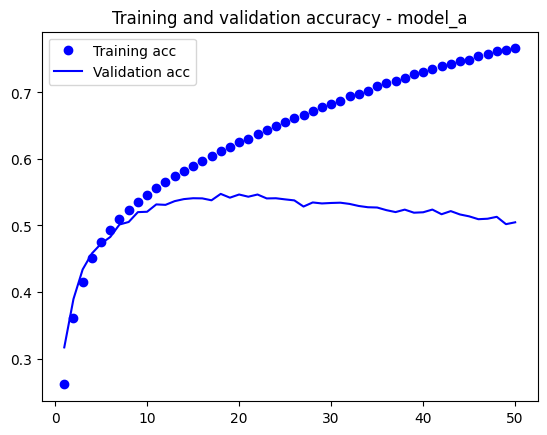

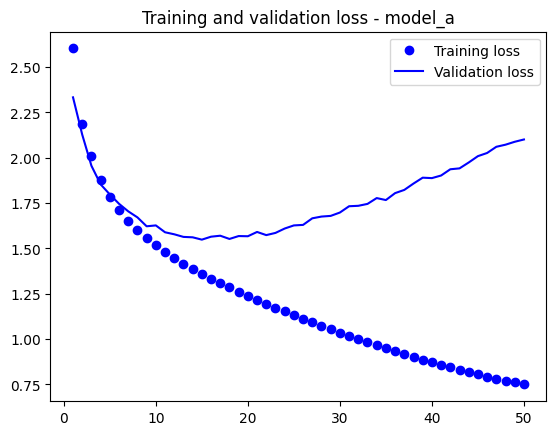

In [31]:
plotPerformance(history_a, "model_a")

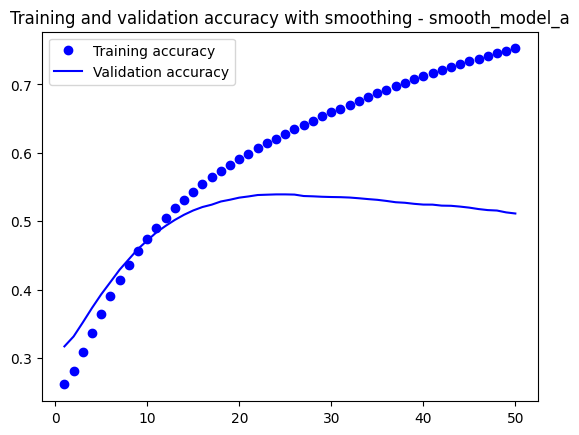

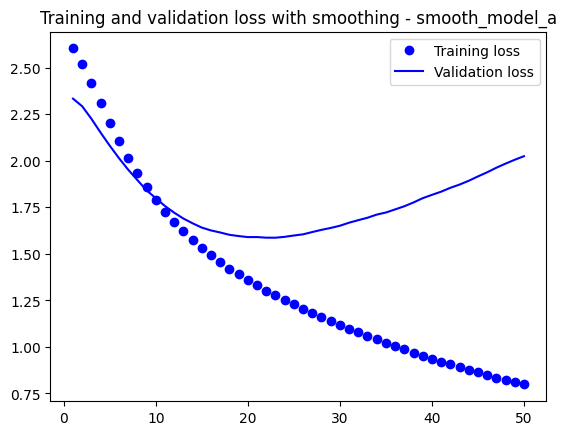

In [32]:
plotSmoothPerformance(history_a, "smooth_model_a")

In [33]:
df_a = saveTrainingistory(history_a, 'model_a')

In [34]:
# Save the Model
model_a.save('text_gen_model_a.h5')

### Regularization - Dropout 0.2 - 20 Epochs

In [35]:
seq_length = 50
model_b = buildModel(seq_length, unique_chars, 0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 128)           84992     
                                                                 
 dropout (Dropout)           (None, 50, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 37)                2405      
                                                                 
Total params: 136,805
Trainable params: 136,805
Non-trainable params: 0
_________________________________________________________________


In [36]:
history_b = model_b.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
839/839 [==============================] - 14s 14ms/step - loss: 2.6607 - acc: 0.2513 - val_loss: 2.3971 - val_acc: 0.3072
Epoch 2/20
839/839 [==============================] - 11s 13ms/step - loss: 2.2557 - acc: 0.3468 - val_loss: 2.1429 - val_acc: 0.3744
Epoch 3/20
839/839 [==============================] - 11s 13ms/step - loss: 2.0816 - acc: 0.3965 - val_loss: 1.9823 - val_acc: 0.4242
Epoch 4/20
839/839 [==============================] - 11s 14ms/step - loss: 1.9607 - acc: 0.4300 - val_loss: 1.8698 - val_acc: 0.4534
Epoch 5/20
839/839 [==============================] - 11s 13ms/step - loss: 1.8789 - acc: 0.4501 - val_loss: 1.7966 - val_acc: 0.4694
Epoch 6/20
839/839 [==============================] - 11s 13ms/step - loss: 1.8137 - acc: 0.4683 - val_loss: 1.7533 - val_acc: 0.4839
Epoch 7/20
839/839 [==============================] - 11s 13ms/step - loss: 1.7670 - acc: 0.4805 - val_loss: 1.7136 - val_acc: 0.4944
Epoch 8/20
839/839 [==============================] - 11s 14ms

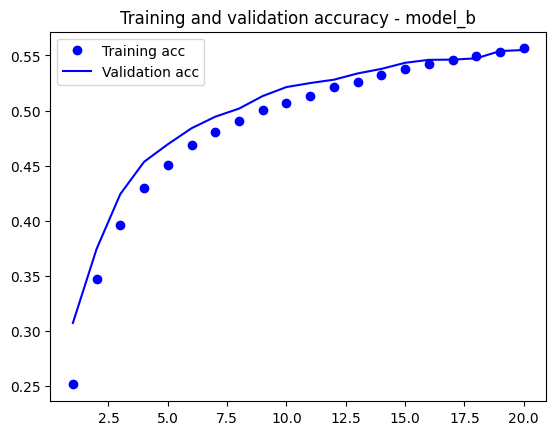

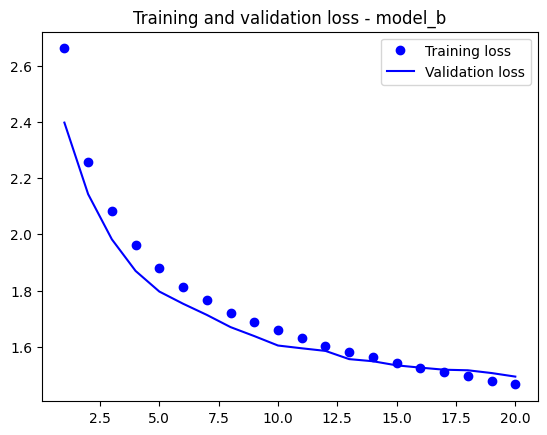

In [37]:
plotPerformance(history_b, "model_b")

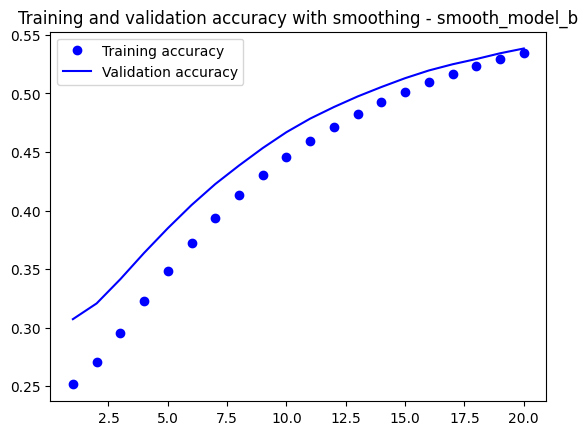

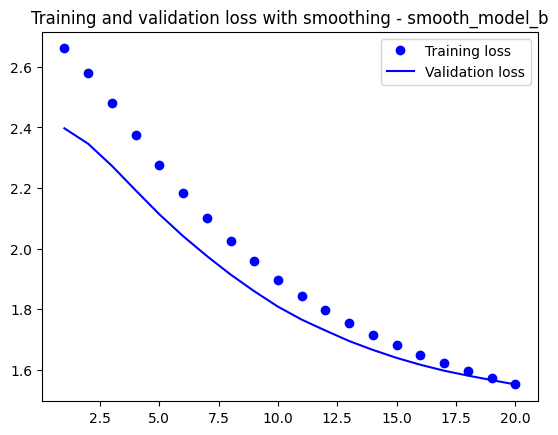

In [38]:
plotSmoothPerformance(history_b, "smooth_model_b")

In [39]:
# Save the Model
model_b.save('text_gen_model_b.h5')

In [40]:
df_b = saveTrainingistory(history_b, 'model_b')

### Regularization - Dropout 0.2 - 30 epochs

In [41]:
model_c = buildModel(seq_length, unique_chars, 0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 128)           84992     
                                                                 
 dropout_2 (Dropout)         (None, 50, 128)           0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 37)                2405      
                                                                 
Total params: 136,805
Trainable params: 136,805
Non-trainable params: 0
_________________________________________________________________


In [42]:
history_c = model_c.fit(X_train, y_train, batch_size=128, epochs=30, validation_split=0.2)

Epoch 1/30
839/839 [==============================] - 14s 14ms/step - loss: 2.6677 - acc: 0.2490 - val_loss: 2.3564 - val_acc: 0.3255
Epoch 2/30
839/839 [==============================] - 11s 13ms/step - loss: 2.2661 - acc: 0.3449 - val_loss: 2.1486 - val_acc: 0.3863
Epoch 3/30
839/839 [==============================] - 12s 14ms/step - loss: 2.0931 - acc: 0.3926 - val_loss: 1.9844 - val_acc: 0.4252
Epoch 4/30
839/839 [==============================] - 12s 14ms/step - loss: 1.9694 - acc: 0.4266 - val_loss: 1.8739 - val_acc: 0.4530
Epoch 5/30
839/839 [==============================] - 12s 14ms/step - loss: 1.8855 - acc: 0.4505 - val_loss: 1.8060 - val_acc: 0.4716
Epoch 6/30
839/839 [==============================] - 12s 14ms/step - loss: 1.8186 - acc: 0.4668 - val_loss: 1.7630 - val_acc: 0.4812
Epoch 7/30
839/839 [==============================] - 12s 14ms/step - loss: 1.7673 - acc: 0.4798 - val_loss: 1.6914 - val_acc: 0.4957
Epoch 8/30
839/839 [==============================] - 12s 14ms

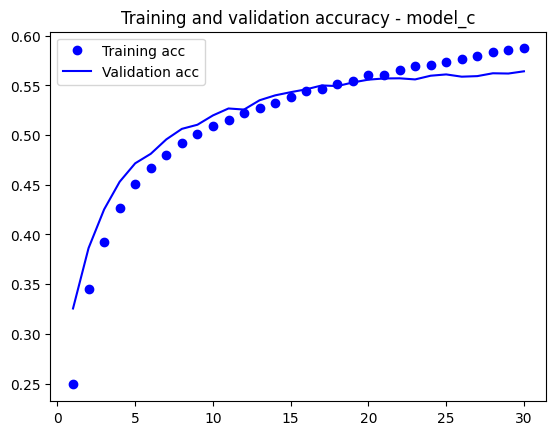

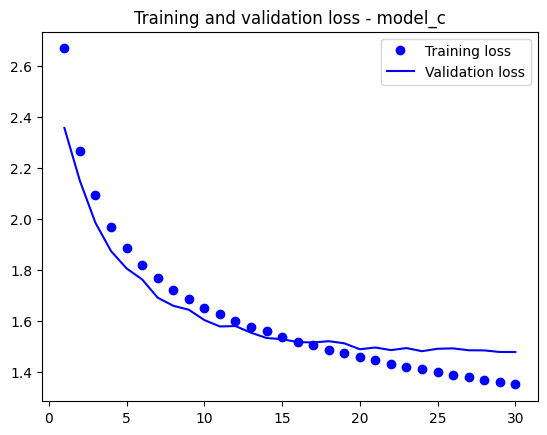

In [43]:
plotPerformance(history_c, "model_c")

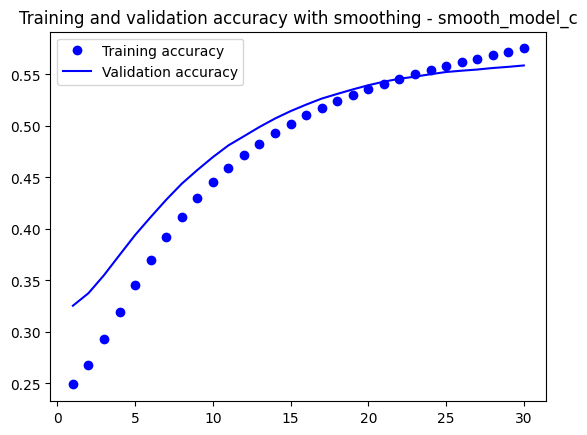

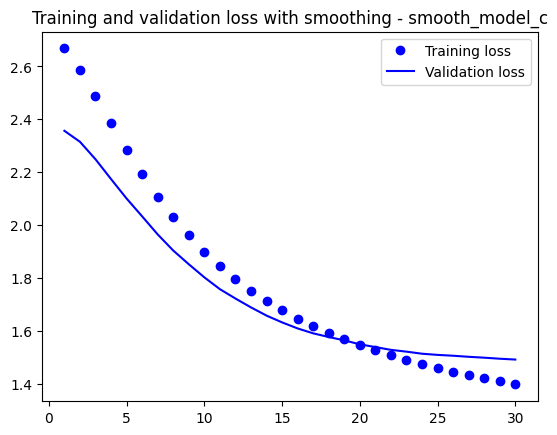

In [44]:
plotSmoothPerformance(history_c, "smooth_model_c")

In [45]:
# Save the Model
model_c.save('text_gen_model_c.h5')

In [46]:
df_c = saveTrainingistory(history_c, 'model_c')

### Early Stopping

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

# Create EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [50]:
model_d = buildModel(seq_length, unique_chars, 0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 50, 128)           84992     
                                                                 
 dropout_6 (Dropout)         (None, 50, 128)           0         
                                                                 
 lstm_9 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 37)                2405      
                                                                 
Total params: 136,805
Trainable params: 136,805
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Fit the model with early stopping
history_d = model_d.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
839/839 [==============================] - 14s 15ms/step - loss: 2.6530 - acc: 0.2531 - val_loss: 2.3614 - val_acc: 0.3214
Epoch 2/50
839/839 [==============================] - 11s 14ms/step - loss: 2.2462 - acc: 0.3491 - val_loss: 2.1065 - val_acc: 0.3894
Epoch 3/50
839/839 [==============================] - 12s 14ms/step - loss: 2.0742 - acc: 0.3963 - val_loss: 1.9729 - val_acc: 0.4244
Epoch 4/50
839/839 [==============================] - 11s 14ms/step - loss: 1.9580 - acc: 0.4305 - val_loss: 1.8752 - val_acc: 0.4538
Epoch 5/50
839/839 [==============================] - 11s 14ms/step - loss: 1.8747 - acc: 0.4509 - val_loss: 1.7979 - val_acc: 0.4691
Epoch 6/50
839/839 [==============================] - 12s 14ms/step - loss: 1.8136 - acc: 0.4673 - val_loss: 1.7507 - val_acc: 0.4827
Epoch 7/50
839/839 [==============================] - 12s 14ms/step - loss: 1.7615 - acc: 0.4819 - val_loss: 1.7027 - val_acc: 0.5016
Epoch 8/50
839/839 [==============================] - 12s 14ms

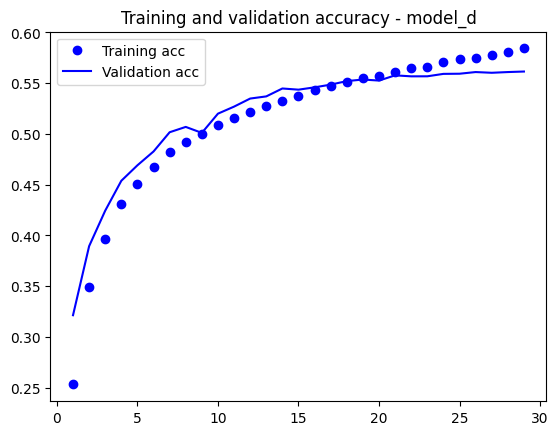

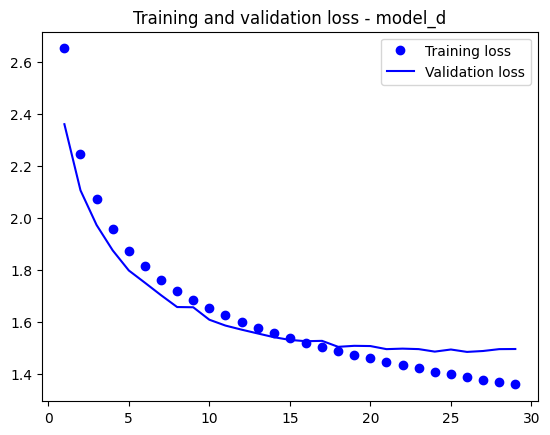

In [52]:
plotPerformance(history_d, "model_d")

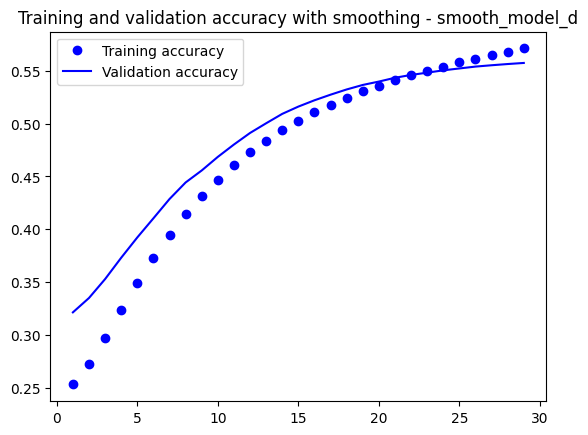

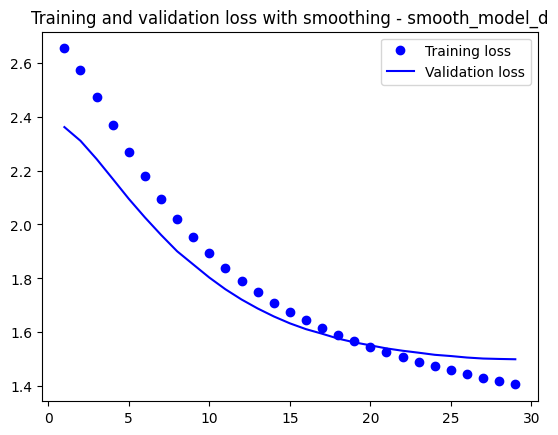

In [53]:
plotSmoothPerformance(history_d, "smooth_model_d")

In [54]:
# Save the Model
model_d.save('text_gen_model_d.h5')

In [55]:
df_d = saveTrainingistory(history_d, 'model_d')

### Baseline Model 2

In [57]:
model_e = buildModel2(seq_length, unique_chars, -1.0)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 50, 256)           301056    
                                                                 
 gru (GRU)                   (None, 128)               148224    
                                                                 
 dense_5 (Dense)             (None, 37)                4773      
                                                                 
Total params: 454,053
Trainable params: 454,053
Non-trainable params: 0
_________________________________________________________________


In [58]:
history_e = model_e.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.2)

Epoch 1/50
839/839 [==============================] - 16s 17ms/step - loss: 2.3351 - acc: 0.3312 - val_loss: 2.0709 - val_acc: 0.4023
Epoch 2/50
839/839 [==============================] - 14s 16ms/step - loss: 1.8747 - acc: 0.4468 - val_loss: 1.8917 - val_acc: 0.4390
Epoch 3/50
839/839 [==============================] - 14s 17ms/step - loss: 1.6953 - acc: 0.4960 - val_loss: 1.6811 - val_acc: 0.5007
Epoch 4/50
839/839 [==============================] - 14s 17ms/step - loss: 1.5746 - acc: 0.5272 - val_loss: 1.6218 - val_acc: 0.5186
Epoch 5/50
839/839 [==============================] - 14s 17ms/step - loss: 1.4776 - acc: 0.5545 - val_loss: 1.5573 - val_acc: 0.5366
Epoch 6/50
839/839 [==============================] - 14s 17ms/step - loss: 1.3951 - acc: 0.5771 - val_loss: 1.5471 - val_acc: 0.5439
Epoch 7/50
839/839 [==============================] - 14s 17ms/step - loss: 1.3188 - acc: 0.5982 - val_loss: 1.5129 - val_acc: 0.5512
Epoch 8/50
839/839 [==============================] - 14s 17ms

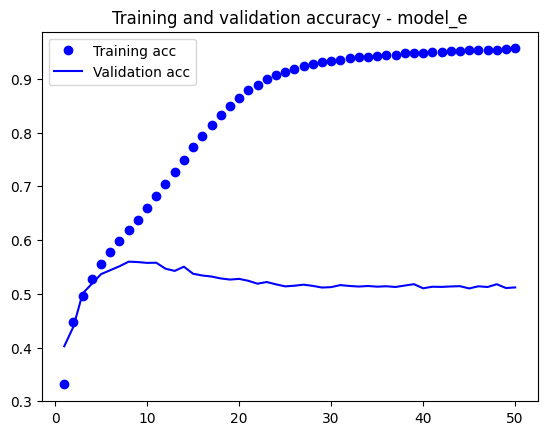

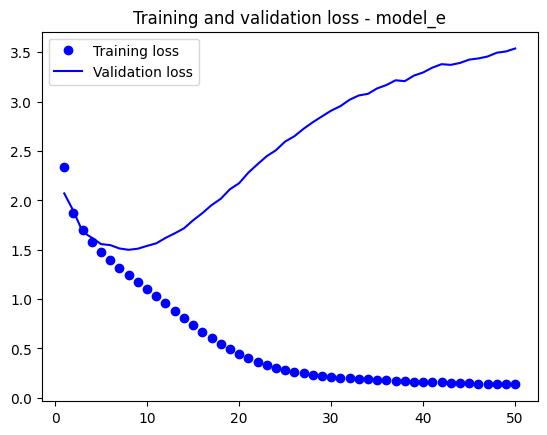

In [59]:
plotPerformance(history_e, "model_e")

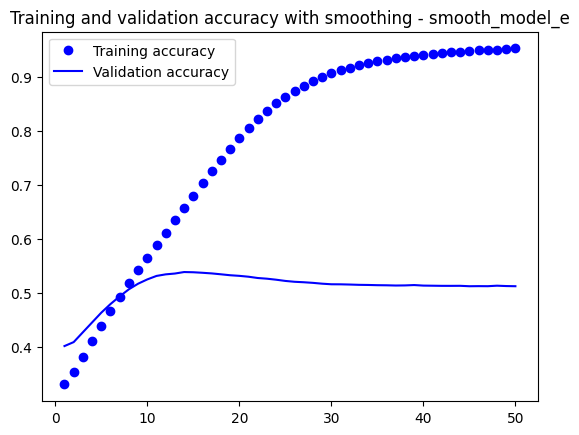

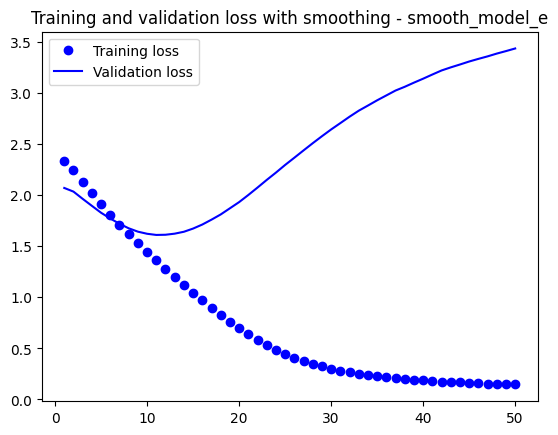

In [60]:
plotSmoothPerformance(history_e, "smooth_model_e")

In [61]:
# Save the Model
model_e.save('text_gen_model_e.h5')

In [62]:
df_e = saveTrainingistory(history_e, 'model_e')

### Regularization - Dropout 0.2 - 20 Epochs

In [63]:
model_f = buildModel2(seq_length, unique_chars, 0.2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 50, 256)           301056    
                                                                 
 dropout_8 (Dropout)         (None, 50, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 128)               148224    
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 37)                4773      
                                                                 
Total params: 454,053
Trainable params: 454,053
Non-trainable params: 0
_________________________________________________________________


In [64]:
history_f = model_f.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
839/839 [==============================] - 17s 18ms/step - loss: 2.4429 - acc: 0.3042 - val_loss: 2.1513 - val_acc: 0.3705
Epoch 2/20
839/839 [==============================] - 14s 17ms/step - loss: 1.9932 - acc: 0.4152 - val_loss: 1.8739 - val_acc: 0.4425
Epoch 3/20
839/839 [==============================] - 15s 17ms/step - loss: 1.8360 - acc: 0.4579 - val_loss: 1.7573 - val_acc: 0.4775
Epoch 4/20
839/839 [==============================] - 15s 17ms/step - loss: 1.7348 - acc: 0.4851 - val_loss: 1.6774 - val_acc: 0.4972
Epoch 5/20
839/839 [==============================] - 15s 18ms/step - loss: 1.6588 - acc: 0.5062 - val_loss: 1.6320 - val_acc: 0.5109
Epoch 6/20
839/839 [==============================] - 15s 18ms/step - loss: 1.5988 - acc: 0.5224 - val_loss: 1.5718 - val_acc: 0.5354
Epoch 7/20
839/839 [==============================] - 15s 18ms/step - loss: 1.5423 - acc: 0.5357 - val_loss: 1.5425 - val_acc: 0.5406
Epoch 8/20
839/839 [==============================] - 15s 18ms

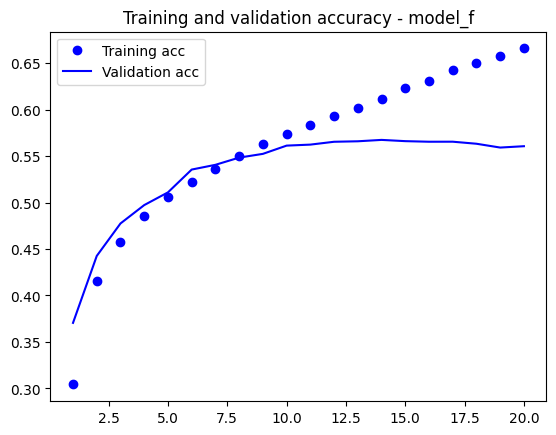

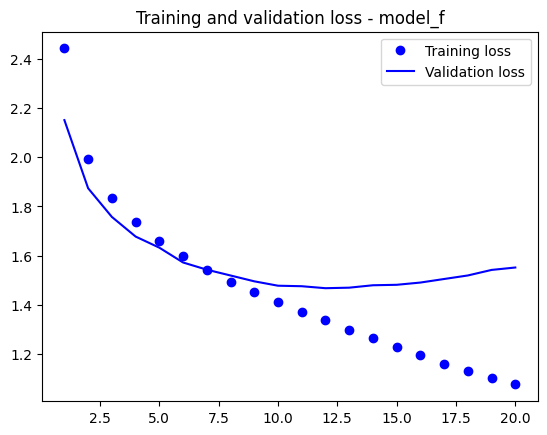

In [65]:
plotPerformance(history_f, "model_f")

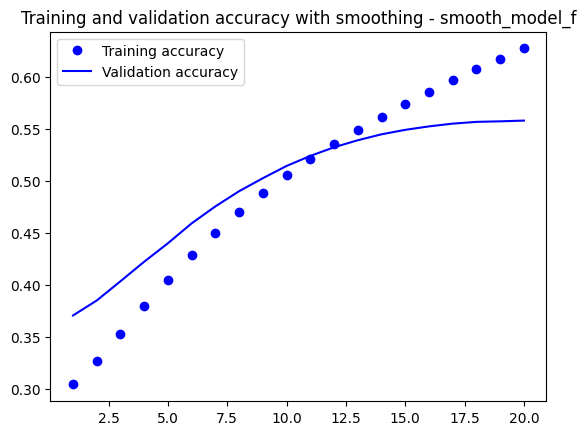

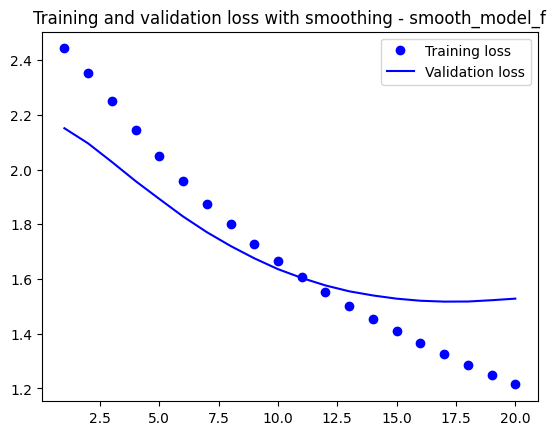

In [66]:
plotSmoothPerformance(history_f, "smooth_model_f")

In [67]:
# Save the Model
model_f.save('text_gen_model_f.h5')

In [68]:
df_f = saveTrainingistory(history_f, 'model_f')

### Regularization - Dropout 0.2 - 15 Epochs

In [69]:
model_g = buildModel2(seq_length, unique_chars, 0.2)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 50, 256)           301056    
                                                                 
 dropout_10 (Dropout)        (None, 50, 256)           0         
                                                                 
 gru_2 (GRU)                 (None, 128)               148224    
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 37)                4773      
                                                                 
Total params: 454,053
Trainable params: 454,053
Non-trainable params: 0
_________________________________________________________________


In [70]:
history_g = model_g.fit(X_train, y_train, batch_size=128, epochs=15, validation_split=0.2)

Epoch 1/15
839/839 [==============================] - 18s 18ms/step - loss: 2.4231 - acc: 0.3095 - val_loss: 2.1091 - val_acc: 0.3934
Epoch 2/15
839/839 [==============================] - 15s 18ms/step - loss: 1.9941 - acc: 0.4156 - val_loss: 1.8774 - val_acc: 0.4448
Epoch 3/15
839/839 [==============================] - 15s 18ms/step - loss: 1.8386 - acc: 0.4580 - val_loss: 1.7423 - val_acc: 0.4820
Epoch 4/15
839/839 [==============================] - 15s 18ms/step - loss: 1.7347 - acc: 0.4846 - val_loss: 1.6675 - val_acc: 0.5042
Epoch 5/15
839/839 [==============================] - 15s 18ms/step - loss: 1.6584 - acc: 0.5050 - val_loss: 1.6138 - val_acc: 0.5167
Epoch 6/15
839/839 [==============================] - 15s 18ms/step - loss: 1.5967 - acc: 0.5209 - val_loss: 1.5635 - val_acc: 0.5332
Epoch 7/15
839/839 [==============================] - 15s 18ms/step - loss: 1.5430 - acc: 0.5369 - val_loss: 1.5373 - val_acc: 0.5404
Epoch 8/15
839/839 [==============================] - 15s 18ms

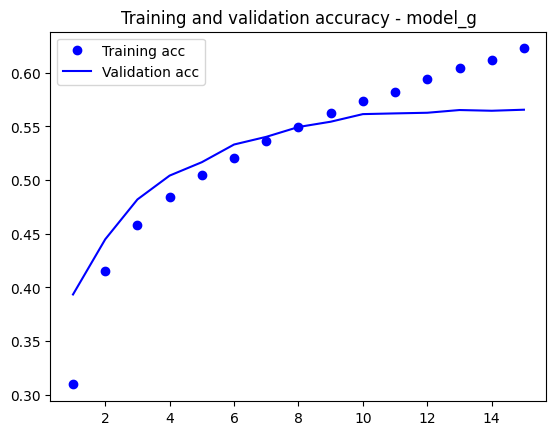

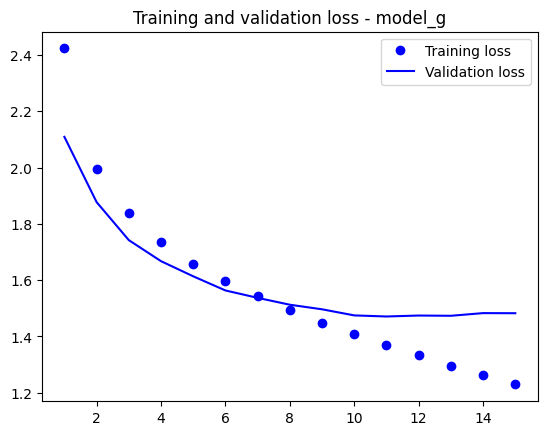

In [71]:
plotPerformance(history_g, "model_g")

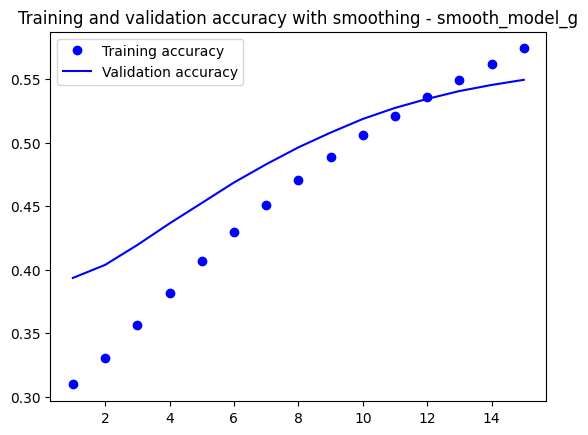

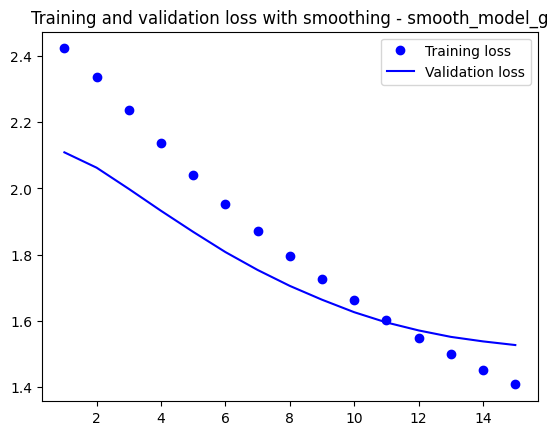

In [72]:
plotSmoothPerformance(history_g, "smooth_model_g")

In [73]:
# Save the Model
model_g.save('text_gen_model_g.h5')

In [74]:
df_g = saveTrainingistory(history_g, 'model_g')

### Early Stopping - Dropout 0.2 - 20 Epochs

In [75]:
model_h = buildModel2(seq_length, unique_chars, 0.2)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 50, 256)           301056    
                                                                 
 dropout_12 (Dropout)        (None, 50, 256)           0         
                                                                 
 gru_3 (GRU)                 (None, 128)               148224    
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 37)                4773      
                                                                 
Total params: 454,053
Trainable params: 454,053
Non-trainable params: 0
_________________________________________________________________


In [76]:
# Fit the model with early stopping
history_h = model_h.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
839/839 [==============================] - 18s 18ms/step - loss: 2.4333 - acc: 0.3061 - val_loss: 2.0905 - val_acc: 0.3974
Epoch 2/20
839/839 [==============================] - 15s 18ms/step - loss: 1.9875 - acc: 0.4194 - val_loss: 1.8598 - val_acc: 0.4489
Epoch 3/20
839/839 [==============================] - 15s 18ms/step - loss: 1.8252 - acc: 0.4615 - val_loss: 1.7397 - val_acc: 0.4819
Epoch 4/20
839/839 [==============================] - 15s 18ms/step - loss: 1.7243 - acc: 0.4874 - val_loss: 1.6543 - val_acc: 0.5068
Epoch 5/20
839/839 [==============================] - 15s 18ms/step - loss: 1.6467 - acc: 0.5092 - val_loss: 1.6090 - val_acc: 0.5187
Epoch 6/20
839/839 [==============================] - 15s 18ms/step - loss: 1.5871 - acc: 0.5252 - val_loss: 1.5550 - val_acc: 0.5353
Epoch 7/20
839/839 [==============================] - 16s 19ms/step - loss: 1.5329 - acc: 0.5382 - val_loss: 1.5480 - val_acc: 0.5347
Epoch 8/20
839/839 [==============================] - 16s 19ms

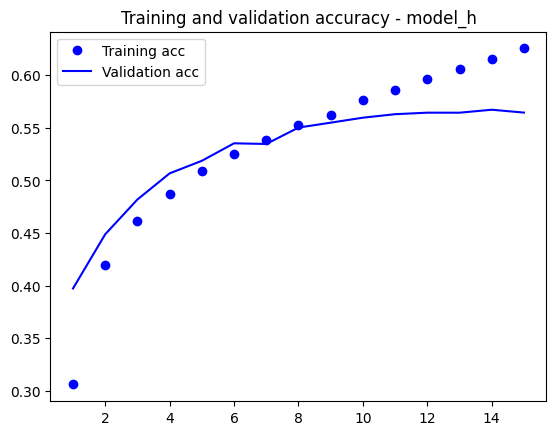

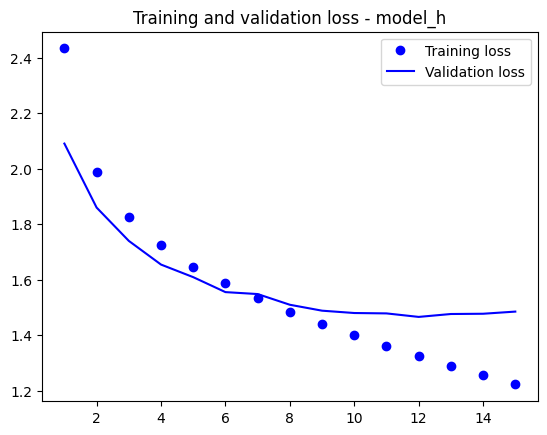

In [77]:
plotPerformance(history_h, "model_h")

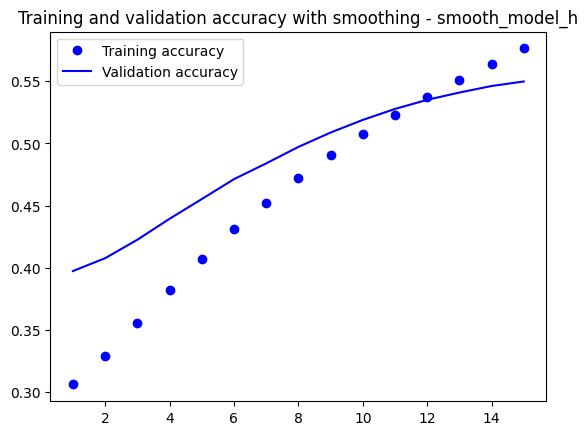

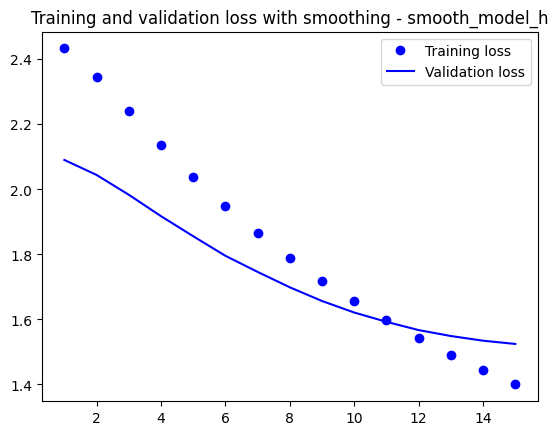

In [78]:
plotSmoothPerformance(history_h, "smooth_model_h")

In [79]:
# Save the Model
model_h.save('text_gen_model_h.h5')

In [80]:
df_h = saveTrainingistory(history_h, 'model_h')

### Model Evaluation

In [81]:
loss_a, acc_a = model_a.evaluate(X_test, y_test, verbose=1)
loss_b, acc_b = model_b.evaluate(X_test, y_test, verbose=1)
loss_c, acc_c = model_c.evaluate(X_test, y_test, verbose=1)
loss_d, acc_d = model_d.evaluate(X_test, y_test, verbose=1)
loss_e, acc_e = model_e.evaluate(X_test, y_test, verbose=1)
loss_f, acc_f = model_f.evaluate(X_test, y_test, verbose=1)
loss_g, acc_g = model_g.evaluate(X_test, y_test, verbose=1)
loss_h, acc_h = model_h.evaluate(X_test, y_test, verbose=1)

1048/1048 [==============================] - 5s 5ms/step - loss: 1.4874 - acc: 0.5577


In [83]:
m1_experiment_results = [
    {"experiment": "Exp_A", "test_loss": loss_a, "test_acc": acc_a},
    {"experiment": "Exp_B", "test_loss": loss_b, "test_acc": acc_b},
    {"experiment": "Exp_C", "test_loss": loss_c, "test_acc": acc_c},
    {"experiment": "Exp_D", "test_loss": loss_d, "test_acc": acc_d},
    {"experiment": "Exp_E", "test_loss": loss_e, "test_acc": acc_e},
    {"experiment": "Exp_F", "test_loss": loss_f, "test_acc": acc_f},
    {"experiment": "Exp_G", "test_loss": loss_g, "test_acc": acc_g},
    {"experiment": "Exp_H", "test_loss": loss_h, "test_acc": acc_h},    
]

# Create a DataFrame
m1_df = pd.DataFrame(m1_experiment_results)

# Round the entire DataFrame to 2 decimal places
m1_df = m1_df.round({"test_loss": 4, "test_acc": 4})

display(m1_df)

# Optionally, if you want to find the best experiment
best_by_acc = m1_df.loc[m1_df['test_acc'].idxmax()]
best_by_loss = m1_df.loc[m1_df['test_loss'].idxmin()]
print("\nBest by accuracy:", best_by_acc, '\n')
print("\nBest by loss:", best_by_loss, '\n')

,experiment,test_loss,test_acc
0,Exp_A,2.1317,0.5023
1,Exp_B,1.5188,0.5444
2,Exp_C,1.5010,0.5587
3,Exp_D,1.5066,0.5557
4,Exp_E,3.5676,0.5103
5,Exp_F,1.5799,0.5547
6,Exp_G,1.4999,0.5627
7,Exp_H,1.4874,0.5577



Best by accuracy: experiment     Exp_G
test_loss     1.4999
test_acc      0.5627
Name: 6, dtype: object 


Best by loss: experiment     Exp_H
test_loss     1.4874
test_acc      0.5577
Name: 7, dtype: object 



### Sampling & Text Generation

In [84]:
# The sample function is used to predict the next character based on the probability distribution.
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

In [85]:
# The generate_text function takes a trained model, a input string, the number of characters to generate, and 
# a temperature value. The function iteratively predicts the next character and appends it to the generated text.
def generate_text(model, start_string, char_to_index, index_to_char, num_chars=400, temperature=1.0):
    # print (f"Temperature is {temperature}")
    
    input_sequence = start_string.lower()

    generated_text = input_sequence

    for _ in range(num_chars):
        X_input = np.zeros((1, len(input_sequence), len(unique_chars)), dtype=bool)
        for i, char in enumerate(input_sequence):
            X_input[0, i, char_to_index.get(char, 0)] = 1

        # Get the predicted probabilities for the next character
        preds = model.predict(X_input, verbose=0)[0]

        next_index = sample(preds, temperature)
        # Find the index of the sampled character
        next_char = index_to_char[next_index]

        # Add the new character to the generated text
        generated_text += next_char

        # Update the input sequence with the new character
        input_sequence = input_sequence[1:] + next_char

    return generated_text

## Step 3 – Use the developed Model to generate the characters / sentences

In [86]:
def pad_or_truncate(text, maxlen):
    # If the text is longer than maxlen, truncate it
    if len(text) > maxlen:
        return text[:maxlen]
    # If the text is shorter than maxlen, pad it with zeros
    elif len(text) < maxlen:
        return text.ljust(maxlen, '0')
    # If the text is exactly maxlen, return it as is
    else:
        return text

In [87]:
seq_length = 50

# takes the user input
# the user input needs to have exact number of characters, equal to "maxlen". OR
# you can write a pad function to add in zeros or cut off the extra characters 
text_input = input().lower()

processed_text = pad_or_truncate(text_input, seq_length)
print(f"Processed text: {processed_text}")

Once upon a time in a faraway land, there lived a beautiful princess
Processed text: once upon a time in a faraway land, there lived a 


In [88]:
for temperature in [0.01, 0.2, 0.5, 1.0]:
    generated_text = generate_text(model_a, processed_text, char_to_index, index_to_char, num_chars=400, temperature=temperature)
    print(f"Generated text using temperature = {temperature}:\n {generated_text}")  

Generated text using temperature = 0.01:
 once upon a time in a faraway land, there lived a sloud patter when the fame of slytherins. harry was a long back into the floor. harry stood at it his wassed before his insee sant professor mcgonagall. it was a pot of lets and something never fanaurs. i was trill sand before the wall lefpriet. his own fan behing over the castle with the castle stopped and spetsing and started up them up and were still believe to letter scket them into the placot
Generated text using temperature = 0.2:
 once upon a time in a faraway land, there lived a slound lectors from the fallowed. they could see that you do inte tet to hermiones at the castle with the castle was leaved in a conded through them the cam. said ron. harry, and hermione lowned all the back wand to long bass and slytherin arroom wither seement for a shart tham apor harry potting ride and leaduls ling at the poster with them. i deect you, said harry and ron everyoked from his book
Generated text 

In [89]:
for temperature in [0.01, 0.2, 0.5, 1.0]:
    generated_text = generate_text(model_b, processed_text, char_to_index, index_to_char, num_chars=400, temperature=temperature)
    print(f"Generated text using temperature = {temperature}:\n {generated_text}") 

Generated text using temperature = 0.01:
 once upon a time in a faraway land, there lived a sume the castle the sparked and the sparked and the sparked and the sparked and the sparked and the sparked and the sparked and the sparked and the sparked and the sparked and the sparked and the sparked and started to harry the started to start the car and the car and the car and the car the manare the sparked and the sparked and the sparked and the sparked and the sparked and the sparked and the
Generated text using temperature = 0.2:
 once upon a time in a faraway land, there lived a sunder and the pare the castle the mandress in the forest and harry was the shade to harry the spall was the sead, harry was stared to dear the started with the could the forest and the fare that malfoy was the bathroom the door the farest the fare and the candress of the only the spall of the had had been harry was been the floor was slid the cand the farest to harry was a should the floor was th
Generated text 

In [90]:
for temperature in [0.01, 0.2, 0.5, 1.0]:
    generated_text = generate_text(model_c, processed_text, char_to_index, index_to_char, num_chars=400, temperature=temperature)
    print(f"Generated text using temperature = {temperature}:\n {generated_text}") 

Generated text using temperature = 0.01:
 once upon a time in a faraway land, there lived a partich the chamber of secrets were better a stare was a stare and stared to see the come in the corridor was a stopped to start with the stared to see the come in the corridor was a stare and stood the chamber of secrets were better a stare was started to see the corridor was a stope of the corridor was a stare and stood the chamber of secrets were better a stare was started to see the corridor w
Generated text using temperature = 0.2:
 once upon a time in a faraway land, there lived a stare and stopped to see the come in the stares of the potions and his been hard and harry was started to see the coment was so dobby harry and so the dark to harry said the hand of his face the bark of the stared to see started to start the chamber of secrets were was the chamber of secrets and the stared to a spare the car harry had been hadded of the stare in the stares of the corridor was the 
Generated text 

In [91]:
for temperature in [0.01, 0.2, 0.5, 1.0]:
    generated_text = generate_text(model_d, processed_text, char_to_index, index_to_char, num_chars=400, temperature=temperature)
    print(f"Generated text using temperature = {temperature}:\n {generated_text}") 

Generated text using temperature = 0.01:
 once upon a time in a faraway land, there lived a sack and started to see the car hand to the car hand to the car hand to the door the started to see the door the stared to see the door the stared to see the door the stared to see the door the started to see the car hand to the car hand to the car hand to the door the car hand to the car hand to the car hand to the car hand to the car hand to the door the started to see the door stared to the doo
Generated text using temperature = 0.2:
 once upon a time in a faraway land, there lived a month and they had the car harry and hermione was a second the door staring to her standed to harry the car hand and said the car hand with the car should they he said harry had to stood the fact of the came off the stares to seen and he said and was a shary started to the car and the school was a trance started to stold the dark and to the car hand to the come of the stares and started to the spa
Generated text 

In [92]:
for temperature in [0.01, 0.2, 0.5, 1.0]:
    generated_text = generate_text(model_e, processed_text, char_to_index, index_to_char, num_chars=400, temperature=temperature)
    print(f"Generated text using temperature = {temperature}:\n {generated_text}") 

Generated text using temperature = 0.01:
 once upon a time in a faraway land, there lived a was exchositill nevelt like this is all of mr. whatty laughtion snot it, harry was pointed out anded to reter at flood smoojy nowing to be snape  norouth the polder of paning and a wander of quest at the wall let mend of the door, not tourrly he armed the bought to enjue make it deep to the sight of not that was a small clos, so surpicy was hermione and ron was staring not to secand with and were 
Generated text using temperature = 0.2:
 once upon a time in a faraway land, there lived a was exchositill nevelt like this is all of mr. whatty looked on anything, said ron, harry, harry had it been defked, too, which were gaining dobby in to apploarm, but harry trinn his nose and who tugn for get offing or what he was usuating, harry page   harry potter and the chamber of secrets  j.k. rowling of and whospidered the toor from the gryffindor comment. marte put is having out excactly di
Generated text 

In [93]:
for temperature in [0.01, 0.2, 0.5, 1.0]:
    generated_text = generate_text(model_f, processed_text, char_to_index, index_to_char, num_chars=400, temperature=temperature)
    print(f"Generated text using temperature = {temperature}:\n {generated_text}") 

Generated text using temperature = 0.01:
 once upon a time in a faraway land, there lived a sich of the starest of the school and hermione shouted and shoulder and the door said malfoy. harry looked at the last of the starest of the school to the castle was and started with a car and spretting a start   harry said dumbledore seemed to the school started to said harry. i was the corridors the something had been spreating a sill clock on the floors dobby grown a stall to the facts and poin
Generated text using temperature = 0.2:
 once upon a time in a faraway land, there lived a school before could before the school started to said harry. i can said harry was harry looked at him with a mance that harry and hermione shouted and said it was a long around the corridor and started with a closed to see harry and ron and hermione started again. harry said the car was looking around the car followed. they were going to stop him with a sprat harry said harry for a dince clacking 
Generated text 

In [94]:
for temperature in [0.01, 0.2, 0.5, 1.0]:
    generated_text = generate_text(model_g, processed_text, char_to_index, index_to_char, num_chars=400, temperature=temperature)
    print(f"Generated text using temperature = {temperature}:\n {generated_text}") 

Generated text using temperature = 0.01:
 once upon a time in a faraway land, there lived a small of spiders of the dirstons of his hand been a spell of purseen of his hand been a spell of purseen of his hand been a spell of purseen of his hand been a spell of purseen of his hand been a spell of purseen of his hand been a spell of purseen of his hand been a spell of purseen of his hand been a spell of purseen of his hand been a spell of purseats of harry had the seaker of hermione someth
Generated text using temperature = 0.2:
 once upon a time in a faraway land, there lived a small of but her might have been a pointed to do it was a small of stunders of the door something to do it was a summer of sid harry, harry potter, you and the gryffindor told her more and harry had been heart had to see the more and harry had been have to pearly headless never was a long his feet of still seemed to be a small back of the came on the door and professor mcgonagall. harry potter, sa
Generated text 

In [95]:
for temperature in [0.01, 0.2, 0.5, 1.0]:
    generated_text = generate_text(model_h, processed_text, char_to_index, index_to_char, num_chars=400, temperature=temperature)
    print(f"Generated text using temperature = {temperature}:\n {generated_text}") 

Generated text using temperature = 0.01:
 once upon a time in a faraway land, there lived a distrange and down the car face the car face the car dumbledore said harry and ron and hermione said harry and ron and hermione said harry and ron and hermione said harry and ron and hermione said harry and ron and hermione said harry and ron and hermione said harry and ron and hermione said harry and ron and hermione said harry and ron and hermione said harry and ron and hermione said harry and r
Generated text using temperature = 0.2:
 once upon a time in a faraway land, there lived a professor mcgonagall. hagrid dumbledore said a start of malfoy said harry and ron as they were greating the car of muggles of the car dumbledore said harry and ron and hermione said harry, and he could see the car face the car and harry potter as the car of the came of the car for the car family the cangle of his front of the crowd the castle the came of the could second flew the car and without h
Generated text 